In [1]:
import xarray as xr
import os
import numpy as np
import sys
import json
from datetime import datetime
from time import sleep


import cartopy.crs as ccrs
import matplotlib as mpl
import matplotlib.pyplot as plt



In [1]:
import climetlab as cml

In [26]:
air = xr.open_mfdataset("/mnt/V/Master/climate/skillscores/sfno/20240131-1721/rmse_global*")

In [27]:
air

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440, step: 49)
Coordinates:
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
    time       (step) datetime64[ns] 2019-01-01T06:00:00 ... 2019-01-13T06:00:00
    variable   <U3 'u10'
  * step       (step) int64 6 12 18 24 30 36 42 ... 258 264 270 276 282 288 294
Data variables:
    rmse       (step, latitude, longitude) float32 dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>

In [33]:
st1 = air.sel(step=[6])
st3 = st1['rmse'].squeeze()

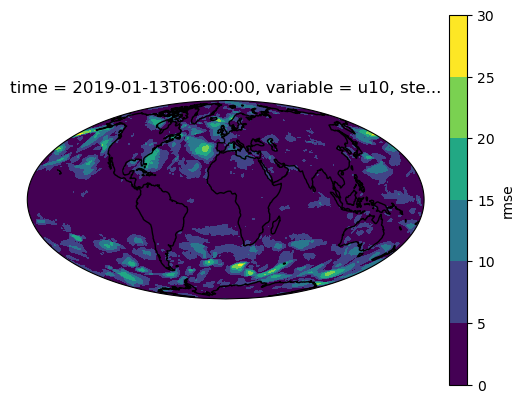

In [38]:


ax = plt.axes(projection=ccrs.Orthographic(-80, 35))
ax.set_global()
st3.plot.contourf(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines()


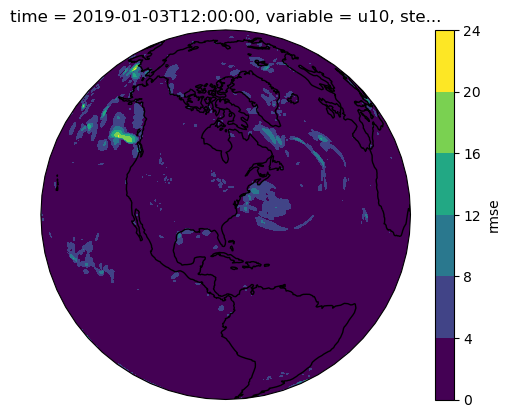

In [35]:
st3 = air.sel(step=[6*10])['rmse'].squeeze()

ax = plt.axes(projection=ccrs.Orthographic(-80, 35))
ax.set_global()
st3.plot.contourf(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines()


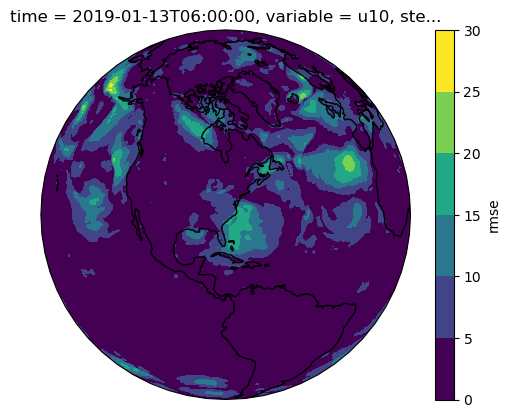

In [37]:
st3 = air.sel(step=[294])['rmse'].squeeze()

ax = plt.axes(projection=ccrs.Orthographic(-80, 35))
ax.set_global()
st3.plot.contourf(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines()


In [4]:
x = cml.load_source("file","/mnt/qb/goswami/data/era5/single_pressure_level/2m_temperature/2m_temperature_2021.nc")

In [6]:
y = x.sel(time="2021-01-01")

NotImplementedError: climetlab.readers.netcdf.NetCDFReader.sel() on /mnt/qb/goswami/data/era5/single_pressure_level/2m_temperature/2m_temperature_2021.nc

In [19]:
t = xr.open_mfdataset(['/mnt/qb/goswami/data/era5/single_pressure_level/2m_temperature/2m_temperature_2019.nc',
                       '/mnt/qb/goswami/data/era5/single_pressure_level/10m_v_component_of_wind/10m_v_component_of_wind_2019.nc',
                      '/mnt/qb/goswami/data/era5/multi_pressure_level/v_component_of_wind/150/v_component_of_wind_2019_150.nc'],parallel=True)
# some end in 2019

In [26]:
t.info()

xarray.Dataset {
dimensions:
	longitude = 1440 ;
	latitude = 721 ;
	time = 8760 ;

variables:
	float32 longitude(longitude) ;
		longitude:units = degrees_east ;
		longitude:long_name = longitude ;
	float32 latitude(latitude) ;
		latitude:units = degrees_north ;
		latitude:long_name = latitude ;
	datetime64[ns] time(time) ;
		time:long_name = time ;
	float32 t2m(time, latitude, longitude) ;
		t2m:units = K ;
		t2m:long_name = 2 metre temperature ;
	float32 v(time, latitude, longitude) ;
		v:units = m s**-1 ;
		v:long_name = V component of wind ;
		v:standard_name = northward_wind ;
	float32 v10(time, latitude, longitude) ;
		v10:units = m s**-1 ;
		v10:long_name = 10 metre V wind component ;

// global attributes:
	:Conventions = CF-1.6 ;
	:history = 2022-07-30 20:50:57 GMT by grib_to_netcdf-2.25.1: /opt/ecmwf/mars-client/bin/grib_to_netcdf.bin -S param -o /cache/data5/adaptor.mars.internal-1659213908.3812256-27100-9-fd81b27d-ffca-4e74-af70-5c5a1c575091.nc /cache/tmp/fd81b27d-ffca-4e74-

In [22]:
time = datetime(2019,1,1,2)
test = t.sel(time=time)

In [24]:
n = test.to_array()

In [1]:
import torch


In [2]:
torch.cuda.is_available()

False

In [ ]:
nump = n.to_numpy()

In [3]:
variable = '2m_temperature'
basePath = "/mnt/qb/work2/goswami0/gkd965/"
mean_file = os.path.join(basePath,"climate","hourofyear_mean_for_"+variable+"_from_1979_to_2019created_20231206-1713.nc")
model_file_sfno = os.path.join(basePath,'outputs','v10_SFNO_HalfYearForecast_startfrom_2021-01-01.nc')
model_file_fcn = os.path.join(basePath,'outputs','v10_FCN_HalfYearForecast_startfrom_2021-01-01.nc')
save_file = os.path.join(basePath,'')
dataPath = os.path.join("/mnt/qb/goswami/data/era5","single_pressure_level",variable,variable+"_{}.nc")

ds_sfno = xr.open_dataset(model_file_sfno).to_array().squeeze()
ds_fcn = xr.open_dataset(model_file_fcn).to_array().squeeze()
ds_ref  = xr.open_dataset(mean_file).to_array().squeeze()[:ds_sfno.dims["step"]*6:6]
g_truth = xr.open_dataset(dataPath.format(2021)).to_array().squeeze()[:ds_sfno.dims["step"]*6:6]



FileNotFoundError: [Errno 2] No such file or directory: '/mnt/qb/work2/goswami0/gkd965/outputs/v10_SFNO_HalfYearForecast_startfrom_2021-01-01.nc'

In [4]:
basePath = "/mnt/qb/work2/goswami0/gkd965/climate/"
basePath_data = "/mnt/qb/goswami/data/era5"

In [5]:
d1 = xr.open_dataset(os.path.join(basePath,"mean_for_loop_numpy_4years.nc"))
d2 = xr.open_dataset(os.path.join(basePath,"mean_for_loop_xarray_4years.nc"))
d3 = xr.open_dataset(os.path.join(basePath,"mean_for_loop_xarray_4years2.nc"))

o1 = xr.open_dataset(os.path.join(basePath_data, 'single_pressure_level', '10m_v_component_of_wind', "10m_v_component_of_wind_1990.nc"))
o2 = xr.open_dataset(os.path.join(basePath_data, 'single_pressure_level', '10m_v_component_of_wind', "10m_v_component_of_wind_1991.nc"))
o22 = xr.open_dataset(os.path.join(basePath_data, 'single_pressure_level', '10m_v_component_of_wind', "10m_v_component_of_wind_1992.nc"))
o3 = xr.open_dataset(os.path.join(basePath_data, 'single_pressure_level', '10m_v_component_of_wind', "10m_v_component_of_wind_1993.nc"))
# d3 = xr.open_dataset(os.path.join(basePath,"mean_for_loop_numpy_4years.nc")

ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'h5netcdf', 'scipy', 'cfgrib', 'zarr']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
https://docs.xarray.dev/en/stable/user-guide/io.html

In [4]:
o22.info()

xarray.Dataset {
dimensions:
	longitude = 1440 ;
	latitude = 721 ;
	time = 8784 ;

variables:
	float32 longitude(longitude) ;
		longitude:units = degrees_east ;
		longitude:long_name = longitude ;
	float32 latitude(latitude) ;
		latitude:units = degrees_north ;
		latitude:long_name = latitude ;
	datetime64[ns] time(time) ;
		time:long_name = time ;
	float32 v10(time, latitude, longitude) ;
		v10:units = m s**-1 ;
		v10:long_name = 10 metre V wind component ;

// global attributes:
	:Conventions = CF-1.6 ;
	:history = 2022-07-14 21:40:06 GMT by grib_to_netcdf-2.25.1: /opt/ecmwf/mars-client/bin/grib_to_netcdf.bin -S param -o /cache/data1/adaptor.mars.internal-1657834392.3566024-31024-17-23fb2092-6bb1-4966-9993-34af0dca5940.nc /cache/tmp/23fb2092-6bb1-4966-9993-34af0dca5940-adaptor.mars.internal-1657833904.5421054-31024-25-tmp.grib ;
}

In [5]:
o222  = o22.drop_isel(time=list(range((31+28)*24,(31+29)*24)))

In [6]:
o222.info()

xarray.Dataset {
dimensions:
	longitude = 1440 ;
	latitude = 721 ;
	time = 8760 ;

variables:
	float32 longitude(longitude) ;
		longitude:units = degrees_east ;
		longitude:long_name = longitude ;
	float32 latitude(latitude) ;
		latitude:units = degrees_north ;
		latitude:long_name = latitude ;
	datetime64[ns] time(time) ;
		time:long_name = time ;
	float32 v10(time, latitude, longitude) ;
		v10:units = m s**-1 ;
		v10:long_name = 10 metre V wind component ;

// global attributes:
	:Conventions = CF-1.6 ;
	:history = 2022-07-14 21:40:06 GMT by grib_to_netcdf-2.25.1: /opt/ecmwf/mars-client/bin/grib_to_netcdf.bin -S param -o /cache/data1/adaptor.mars.internal-1657834392.3566024-31024-17-23fb2092-6bb1-4966-9993-34af0dca5940.nc /cache/tmp/23fb2092-6bb1-4966-9993-34af0dca5940-adaptor.mars.internal-1657833904.5421054-31024-25-tmp.grib ;
}

In [5]:
d1.info()

xarray.Dataset {
dimensions:
	longitude = 8760 ;
	latitude = 721 ;
	time = 1440 ;

variables:
	float32 v10(longitude, latitude, time) ;

// global attributes:
}

In [23]:
print(d1.isel(longitude=10,latitude=10,time=100).load())


<xarray.Dataset>
Dimensions:  ()
Data variables:
    v10      float32 -3.14


In [20]:
print(d2.isel(longitude=10,latitude=10,time=100).load())

<xarray.Dataset>
Dimensions:                        ()
Coordinates:
    longitude                      float32 2.5
    latitude                       float32 87.5
    time                           int64 0
    variable                       <U3 'v10'
Data variables:
    __xarray_dataarray_variable__  float32 -6.085


In [25]:
print(d3.isel(longitude=10,latitude=10,time=100).load())

<xarray.Dataset>
Dimensions:                        ()
Coordinates:
    longitude                      float32 2.5
    latitude                       float32 87.5
    time                           int64 100
    variable                       <U3 'v10'
Data variables:
    __xarray_dataarray_variable__  float32 3.557


In [31]:
print(o1.isel(longitude=10,latitude=10,time=100).load())

<xarray.Dataset>
Dimensions:    ()
Coordinates:
    longitude  float32 2.5
    latitude   float32 87.5
    time       datetime64[ns] 1990-01-05T04:00:00
Data variables:
    v10        float32 5.748
Attributes:
    Conventions:  CF-1.6
    history:      2022-07-14 20:34:17 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...


In [32]:
print(o2.isel(longitude=10,latitude=10,time=100).load())

<xarray.Dataset>
Dimensions:    ()
Coordinates:
    longitude  float32 2.5
    latitude   float32 87.5
    time       datetime64[ns] 1991-01-05T04:00:00
Data variables:
    v10        float32 -2.989
Attributes:
    Conventions:  CF-1.6
    history:      2022-07-14 21:08:34 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...


In [33]:
print(o3.isel(longitude=10,latitude=10,time=100).load())

<xarray.Dataset>
Dimensions:    ()
Coordinates:
    longitude  float32 2.5
    latitude   float32 87.5
    time       datetime64[ns] 1993-01-05T04:00:00
Data variables:
    v10        float32 0.8282
Attributes:
    Conventions:  CF-1.6
    history:      2022-07-14 22:06:55 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...


In [35]:
(0.8282 + 5.748 - 2.989)/3
(5.748 - 2.989)/2

1.3795000000000002

In [3]:

basePath = "/mnt/qb/goswami/data/era5"
v10_1 = xr.open_dataset(os.path.join(basePath, 'single_pressure_level', '10m_v_component_of_wind', "10m_v_component_of_wind_1992.nc"))
v10_2 = xr.open_dataset(os.path.join(basePath, 'single_pressure_level', '10m_v_component_of_wind', "10m_v_component_of_wind_1991.nc"))


In [4]:
timesteps1 = v10_1.dims["time"]   
timesteps2 = v10_2.dims["time"]   
print(timesteps1)
print(timesteps2)

8784
8760


In [5]:
v10_1.info()

xarray.Dataset {
dimensions:
	longitude = 1440 ;
	latitude = 721 ;
	time = 8784 ;

variables:
	float32 longitude(longitude) ;
		longitude:units = degrees_east ;
		longitude:long_name = longitude ;
	float32 latitude(latitude) ;
		latitude:units = degrees_north ;
		latitude:long_name = latitude ;
	datetime64[ns] time(time) ;
		time:long_name = time ;
	float32 v10(time, latitude, longitude) ;
		v10:units = m s**-1 ;
		v10:long_name = 10 metre V wind component ;

// global attributes:
	:Conventions = CF-1.6 ;
	:history = 2022-07-14 21:40:06 GMT by grib_to_netcdf-2.25.1: /opt/ecmwf/mars-client/bin/grib_to_netcdf.bin -S param -o /cache/data1/adaptor.mars.internal-1657834392.3566024-31024-17-23fb2092-6bb1-4966-9993-34af0dca5940.nc /cache/tmp/23fb2092-6bb1-4966-9993-34af0dca5940-adaptor.mars.internal-1657833904.5421054-31024-25-tmp.grib ;
}

In [6]:
year=1992
# v10_1_drop = v10_1.drop_sel(time=slice(str(year)+"-02-29",str(year)+"-03-01"))
v10_1_drop = v10_1.where((v10_1["time"] == "1990-02-29") | (v10_1["time"] > 2000), drop=True)
v10_1_drop.dims["time"]   

TypeError: unhashable type: 'slice'

In [ ]:
v10_1.where(v10_1["time"] == "1992-02-29")

In [6]:
v10_1.sel(time="1992-02-29")

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 24)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1992-02-29 ... 1992-02-29T23:00:00
Data variables:
    v10        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-07-14 21:40:06 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [18]:
t = v10_1.sel(time="1992-02-29")

In [22]:
v10_1.isel(time=(31+28)*24)

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
    time       datetime64[ns] 1992-02-29
Data variables:
    v10        (latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-07-14 21:40:06 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [24]:
droped = v10_1.drop_isel(time=list(range((31+28)*24,(31+29)*24)))

In [25]:
droped.dims["time"]

8760

In [29]:
v10_2.isel(time=(31+28)*24)

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
    time       datetime64[ns] 1991-03-01
Data variables:
    v10        (latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-07-14 21:08:34 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [16]:
t.dims["time"]

8783

In [15]:
print(t.sel(time="1992-02").coords["time"].to_numpy())

['1992-02-01T00:00:00.000000000' '1992-02-01T01:00:00.000000000'
 '1992-02-01T02:00:00.000000000' '1992-02-01T03:00:00.000000000'
 '1992-02-01T04:00:00.000000000' '1992-02-01T05:00:00.000000000'
 '1992-02-01T06:00:00.000000000' '1992-02-01T07:00:00.000000000'
 '1992-02-01T08:00:00.000000000' '1992-02-01T09:00:00.000000000'
 '1992-02-01T10:00:00.000000000' '1992-02-01T11:00:00.000000000'
 '1992-02-01T12:00:00.000000000' '1992-02-01T13:00:00.000000000'
 '1992-02-01T14:00:00.000000000' '1992-02-01T15:00:00.000000000'
 '1992-02-01T16:00:00.000000000' '1992-02-01T17:00:00.000000000'
 '1992-02-01T18:00:00.000000000' '1992-02-01T19:00:00.000000000'
 '1992-02-01T20:00:00.000000000' '1992-02-01T21:00:00.000000000'
 '1992-02-01T22:00:00.000000000' '1992-02-01T23:00:00.000000000'
 '1992-02-02T00:00:00.000000000' '1992-02-02T01:00:00.000000000'
 '1992-02-02T02:00:00.000000000' '1992-02-02T03:00:00.000000000'
 '1992-02-02T04:00:00.000000000' '1992-02-02T05:00:00.000000000'
 '1992-02-02T06:00:00.000

In [ ]:
xr.align(v10_1,v10_2, join='exact')

In [2]:

basePath = "/mnt/qb/goswami/data/era5"
savepath = "/mnt/qb/work2/goswami0/gkd965/climate/chunky"
monitor_savepath = os.path.join(savepath,"monitor"+datetime.now().strftime("%Y%m%d-%H%M")+".json")
ds = xr.open_mfdataset(os.path.join(basePath, 'single_pressure_level', '10m_v_component_of_wind', "10m_v_component_of_wind_????.nc"),parallel=True)

work = [(lat,long) for lat in range(ds.sizes["latitude"]) for long in range(ds.sizes["longitude"])]

for lat, long in work:
    for year in range(1959,2022):
        for month in range(1,13):
            for day in range(1,32):
                if day == 31 and month in [2,4,6,9,11]:
                    continue
                if day == 30 and month == 2:
                    continue
                if day == 29 and month == 2 and year not in range(1948,2025,4):
                    continue
                for hour in range(0,24,6):
                    ds_lat_long = ds.sel(latitude=lat,longitude=long,time=datetime(year,month,day,hour,0),method='nearest')
                    ds_lat_long.info()
                    break
                break
            break
        break
    break

xarray.Dataset {
dimensions:

variables:
	float32 longitude() ;
		longitude:units = degrees_east ;
		longitude:long_name = longitude ;
	float32 latitude() ;
		latitude:units = degrees_north ;
		latitude:long_name = latitude ;
	datetime64[ns] time() ;
		time:long_name = time ;
	float32 v10() ;
		v10:units = m s**-1 ;
		v10:long_name = 10 metre V wind component ;

// global attributes:
	:Conventions = CF-1.6 ;
	:history = 2022-07-14 14:01:09 GMT by grib_to_netcdf-2.25.1: /opt/ecmwf/mars-client/bin/grib_to_netcdf.bin -S param -o /cache/data1/adaptor.mars.internal-1657806762.467146-16033-8-e12dca0a-c8ec-405a-9f94-5781ea6dc0fe.nc /cache/tmp/e12dca0a-c8ec-405a-9f94-5781ea6dc0fe-adaptor.mars.internal-1657806279.235086-16033-9-tmp.grib ;
}

In [3]:
import psutil

In [5]:
pid = os.getpid()
print(pid)

43065


In [6]:
def system_monitor(printout=False,pids=[],names=[]):
    system = {}
    mem_percent = psutil.virtual_memory()[2]
    mem_used = psutil.virtual_memory()[3]/1000000000
    mem_total = psutil.virtual_memory()[1]/1000000000
    processes = []
    for i,pid in enumerate(pids):
        python_process = psutil.Process(pid)
        mem_proc = python_process.memory_percent()
        mem_proc_percent = python_process.memory_info()[0]/2.**30  # memory use in GB...I think
        processes.append({"pid":pid,"process":names[i],"memory percent":mem_proc,"memory used(GB)":mem_proc_percent})
    cores = os.cpu_count()
    cpu_percent = psutil.cpu_percent()
    loads = psutil.getloadavg()
    cpu_usage = [load/cores* 100 for load in loads]
    if printout:
        print("RAM:")
        print('    memory % used:', mem_percent)
        print('    Used (GB):', mem_used)
        print('    Total available (GB):', mem_total)
        # use memory_profiler  for line by line memory analysis, add @profile above function
        # Ram for certain process:
        print('    Process memory used (GB):', mem_proc)
        print("    Process memory used : ", mem_proc_percent)

        print("CPU:")
        print("    available cores: ",cores)
        print("    util: ",cpu_percent)
        print("    averge load over 1, 5 ,15 min: ",cpu_usage)
    
    system["memory percent"] =  mem_percent
    system["memory used(GB)"] =  mem_used
    system["memory total available (GB)"] =  mem_total
    system["processes"] =  processes
    system["cpu percent"] =  cpu_percent
    system["cpu usage"] =  cpu_usage
    system["cores"] =  cores

    return system

In [6]:
python_process = psutil.Process(pid)
mem_proc = python_process.memory_percent()
mem_proc_percent = python_process.memory_info()[0]/2.**30 

print('    Process memory used (GB):', mem_proc)
print("    Process memory used : ", mem_proc_percent)

    Process memory used (GB): 0.08955224939542299
    Process memory used :  0.33704376220703125


In [ ]:
# loded = ds.sel(time=slice(datetime(1990,1,1,0,0),datetime(1990,1,1,22,0))).load()
loaded2 = ds.sel(time=slice('1990-01-01', '1990-03-01')).load()

In [6]:
stats = system_monitor(True,[os.getpid()],["main"])

RAM:
    memory % used: 5.9
    Used (GB): 21.925208064
    Total available (GB): 380.155244544
    Process memory used (GB): 0.08955934432882462
    Process memory used :  0.3370704650878906
CPU:
    available cores:  72
    util:  6.0
    averge load over 1, 5 ,15 min:  [6.916666666666667, 6.194444444444444, 6.180555555555555]


In [14]:
ds_lat_long_time = ds.sel(time=datetime(year,month,day,hour,0),method='nearest').load()


In [ ]:
ds_loaded = ds.load()

In [8]:
stats = system_monitor(True,[os.getpid()],["main"])

RAM:
    memory % used: 6.7
    Used (GB): 24.971821056
    Total available (GB): 377.108660224
    Process memory used (GB): 0.8792791507121465
    Process memory used :  3.3093032836914062
CPU:
    available cores:  72
    util:  6.0
    averge load over 1, 5 ,15 min:  [6.25, 6.194444444444444, 6.180555555555555]


In [22]:
loded.info()

xarray.Dataset {
dimensions:
	longitude = 1440 ;
	latitude = 721 ;
	time = 0 ;

variables:
	float32 longitude(longitude) ;
		longitude:units = degrees_east ;
		longitude:long_name = longitude ;
	float32 latitude(latitude) ;
		latitude:units = degrees_north ;
		latitude:long_name = latitude ;
	datetime64[ns] time(time) ;
		time:long_name = time ;
	float32 v10(time, latitude, longitude) ;
		v10:units = m s**-1 ;
		v10:long_name = 10 metre V wind component ;

// global attributes:
	:Conventions = CF-1.6 ;
	:history = 2022-07-14 14:01:09 GMT by grib_to_netcdf-2.25.1: /opt/ecmwf/mars-client/bin/grib_to_netcdf.bin -S param -o /cache/data1/adaptor.mars.internal-1657806762.467146-16033-8-e12dca0a-c8ec-405a-9f94-5781ea6dc0fe.nc /cache/tmp/e12dca0a-c8ec-405a-9f94-5781ea6dc0fe-adaptor.mars.internal-1657806279.235086-16033-9-tmp.grib ;
}

In [29]:
p = loded.to_array()
p

<xarray.DataArray (variable: 1, time: 23, latitude: 721, longitude: 1440)>
array([[[[-0.44204712, -0.44204712, -0.44204712, ..., -0.44204712,
          -0.44204712, -0.44204712],
         [ 0.7951164 ,  0.80436134,  0.8136053 , ...,  0.762763  ,
           0.7735472 ,  0.7843323 ],
         [ 0.8675289 ,  0.87831306,  0.8937206 , ...,  0.81668663,
           0.8382559 ,  0.8552036 ],
         ...,
         [-6.2581034 , -6.265806  , -6.2765913 , ..., -6.216505  ,
          -6.234993  , -6.2488594 ],
         [-6.553913  , -6.5600758 , -6.5662384 , ..., -6.526181  ,
          -6.535425  , -6.544669  ],
         [ 0.01861572,  0.01861572,  0.01861572, ...,  0.01861572,
           0.01861572,  0.01861572]],

        [[-0.34036255, -0.34036255, -0.34036255, ..., -0.34036255,
          -0.34036255, -0.34036255],
         [ 0.5285797 ,  0.5378237 ,  0.54706764, ...,  0.49622536,
           0.50701046,  0.5177946 ],
         [ 0.6210203 ,  0.6302643 ,  0.6456709 , ...,  0.5717182 ,
           0.5932884 ,  0.60869503],
...
         [-7.123964  , -7.1347485 , -7.145533  , ..., -7.076203  ,
          -7.094691  , -7.1116385 ],
         [-7.162481  , -7.1686435 , -7.176347  , ..., -7.131667  ,
          -7.142452  , -7.1532364 ],
         [ 0.11259651,  0.11259651,  0.11259651, ...,  0.11259651,
           0.11259651,  0.11259651]],

        [[-0.3465252 , -0.3465252 , -0.3465252 , ..., -0.3465252 ,
          -0.3465252 , -0.3465252 ],
         [ 2.3065205 ,  2.3188457 ,  2.3327122 , ...,  2.2603016 ,
           2.2757072 ,  2.2911148 ],
         [ 2.5006466 ,  2.5160542 ,  2.5376225 , ...,  2.428234  ,
           2.4590473 ,  2.4836998 ],
         ...,
         [-7.2934384 , -7.3026824 , -7.3150077 , ..., -7.2425957 ,
          -7.2626247 , -7.2811127 ],
         [-7.395123  , -7.4028263 , -7.408989  , ..., -7.3627687 ,
          -7.3735533 , -7.3843384 ],
         [ 0.14495087,  0.14495087,  0.14495087, ...,  0.14495087,
           0.14495087,  0.14495087]]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1990-01-01 ... 1990-01-01T22:00:00
  * variable   (variable) object 'v10'
Attributes:
    Conventions:  CF-1.6
    history:      2022-07-14 14:01:09 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [30]:
loaded2.info()

xarray.Dataset {
dimensions:
	longitude = 1440 ;
	latitude = 721 ;
	time = 768 ;

variables:
	float32 longitude(longitude) ;
		longitude:units = degrees_east ;
		longitude:long_name = longitude ;
	float32 latitude(latitude) ;
		latitude:units = degrees_north ;
		latitude:long_name = latitude ;
	datetime64[ns] time(time) ;
		time:long_name = time ;
	float32 v10(time, latitude, longitude) ;
		v10:units = m s**-1 ;
		v10:long_name = 10 metre V wind component ;

// global attributes:
	:Conventions = CF-1.6 ;
	:history = 2022-07-14 14:01:09 GMT by grib_to_netcdf-2.25.1: /opt/ecmwf/mars-client/bin/grib_to_netcdf.bin -S param -o /cache/data1/adaptor.mars.internal-1657806762.467146-16033-8-e12dca0a-c8ec-405a-9f94-5781ea6dc0fe.nc /cache/tmp/e12dca0a-c8ec-405a-9f94-5781ea6dc0fe-adaptor.mars.internal-1657806279.235086-16033-9-tmp.grib ;
}

In [8]:
ds = xr.open_dataset(os.path.join(basePath, 'single_pressure_level', '10m_v_component_of_wind', "10m_v_component_of_wind_1990.nc"))


In [9]:
ds.info()

xarray.Dataset {
dimensions:
	longitude = 1440 ;
	latitude = 721 ;
	time = 8760 ;

variables:
	float32 longitude(longitude) ;
		longitude:units = degrees_east ;
		longitude:long_name = longitude ;
	float32 latitude(latitude) ;
		latitude:units = degrees_north ;
		latitude:long_name = latitude ;
	datetime64[ns] time(time) ;
		time:long_name = time ;
	float32 v10(time, latitude, longitude) ;
		v10:units = m s**-1 ;
		v10:long_name = 10 metre V wind component ;

// global attributes:
	:Conventions = CF-1.6 ;
	:history = 2022-07-14 20:34:17 GMT by grib_to_netcdf-2.25.1: /opt/ecmwf/mars-client/bin/grib_to_netcdf.bin -S param -o /cache/data7/adaptor.mars.internal-1657830450.5985415-23599-16-5297c509-9e3e-461b-91a9-7d5646b6ceba.nc /cache/tmp/5297c509-9e3e-461b-91a9-7d5646b6ceba-adaptor.mars.internal-1657829999.4723523-23599-23-tmp.grib ;
}

In [7]:
stats = system_monitor(True,[os.getpid()],["main"])

RAM:
    memory % used: 5.9
    Used (GB): 21.782892544
    Total available (GB): 380.29758464
    Process memory used (GB): 0.09096515470426265
    Process memory used :  0.3423614501953125
CPU:
    available cores:  72
    util:  5.7
    averge load over 1, 5 ,15 min:  [5.916666666666667, 6.097222222222222, 6.138888888888889]


In [ ]:
year_loaded = ds.load()

In [18]:
from datetime import date
year=1980
month=1
day=25
y = date(year,month,day)

In [9]:
x = np.datetime64('2010-03-14T15:00:00.00')

In [19]:
y

datetime.date(1980, 1, 25)

In [12]:
x

numpy.datetime64('2010-03-14T15:00:00.000')

In [30]:
s_lat_long = ds.isel(latitude=0,longitude=0,hourofyear='01-01 00')

ValueError: Dimensions {'hourofyear'} do not exist. Expected one or more of Frozen({'longitude': 1440, 'latitude': 721, 'time': 376944})

In [27]:
ds['hourofyear'] = xr.DataArray(ds.time.dt.strftime('%m-%d %H'), coords=ds.time.coords)

In [29]:
s_lat_long

<xarray.Dataset>
Dimensions:     ()
Coordinates:
    longitude   float32 0.0
    latitude    float32 90.0
    time        datetime64[ns] 1979-01-01
Data variables:
    v10         float32 dask.array<chunksize=(), meta=np.ndarray>
    hourofyear  object '01-01 00'
Attributes:
    Conventions:  CF-1.6
    history:      2022-07-14 14:01:09 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [3]:
f = "/mnt/qb/work2/goswami0/gkd965/climate/chunky/10m_v_1959-2021_hourofyear_mean_0-lat_0-long_notebook.nc"
d = xr.open_dataset(f)
d.info()

xarray.Dataset {
dimensions:
	hourofyear = 8784 ;

variables:
	float32 v10(hourofyear) ;
		v10:units = m s**-1 ;
		v10:long_name = 10 metre V wind component ;
	float32 longitude() ;
		longitude:units = degrees_east ;
		longitude:long_name = longitude ;
	float32 latitude() ;
		latitude:units = degrees_north ;
		latitude:long_name = latitude ;
	<U8 hourofyear(hourofyear) ;

// global attributes:
	:Conventions = CF-1.6 ;
	:history = 2022-07-14 14:01:09 GMT by grib_to_netcdf-2.25.1: /opt/ecmwf/mars-client/bin/grib_to_netcdf.bin -S param -o /cache/data1/adaptor.mars.internal-1657806762.467146-16033-8-e12dca0a-c8ec-405a-9f94-5781ea6dc0fe.nc /cache/tmp/e12dca0a-c8ec-405a-9f94-5781ea6dc0fe-adaptor.mars.internal-1657806279.235086-16033-9-tmp.grib ;
}

In [9]:
d.isel(hourofyear=0).load()

<xarray.Dataset>
Dimensions:     ()
Coordinates:
    longitude   float32 0.0
    latitude    float32 90.0
    hourofyear  <U8 '01-01 00'
Data variables:
    v10         float32 -0.04397
Attributes:
    Conventions:  CF-1.6
    history:      2022-07-14 14:01:09 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [10]:
x = d.to_array()

In [11]:
x

<xarray.DataArray (variable: 1, hourofyear: 8784)>
array([[-0.04396834, -0.04540868, -0.04013153, ..., -0.06221897,
        -0.04437999, -0.0228117 ]], dtype=float32)
Coordinates:
    longitude   float32 0.0
    latitude    float32 90.0
  * hourofyear  (hourofyear) <U8 '01-01 00' '01-01 01' ... '12-31 22' '12-31 23'
  * variable    (variable) object 'v10'
Attributes:
    Conventions:  CF-1.6
    history:      2022-07-14 14:01:09 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [12]:

import matplotlib.pyplot as plt

ImportError: libtiff.so.5: cannot open shared object file: No such file or directory